# Import libs

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
import torch.optim as optim
from torch_lr_finder import LRFinder

# custom libs
from libs.PretrainedModels import AlexNet_cc, SqueezeNet_cc, ResNet18_cc, SqueezeNet1_cc, Vgg11_cc, Vgg11_bn_cc, Densenet121_cc, MobilenetV2_cc, InceptionV3_cc
from libs.utils import reverse_norm, init_model
from libs.Dataset import dst, dst_inceptionv3

In [2]:
random.seed(1996)
np.random.seed(1996)

In [6]:
batch_size=32
num_workers=2
drop_last=True

dst.create_data_loader(batch_size=batch_size, num_workers=num_workers, drop_last=drop_last)
dst_inceptionv3.create_data_loader(batch_size=batch_size, num_workers=num_workers, drop_last=drop_last)

## Visualizing dataset

#### Training

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


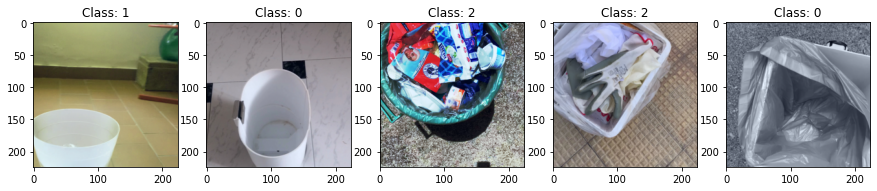

In [4]:
train_features, train_labels = next(iter(dst.training_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Class: %s" % train_labels[0].numpy())
    img = train_features[0].squeeze()
    label = train_labels[0]
    plt.imshow(reverse_norm(img.numpy().transpose(1, 2, 0)))
    train_features, train_labels = next(iter(dst.training_loader))
plt.show()

#### Validation

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


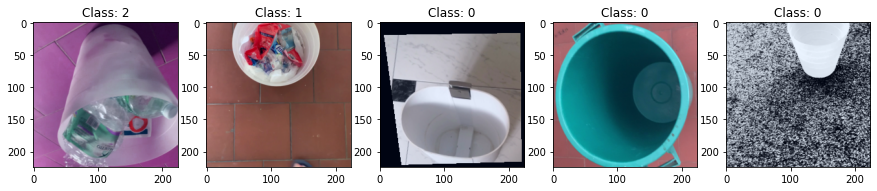

In [5]:
val_features, val_labels = next(iter(dst.validation_loader))
print(f"Feature batch shape: {val_features.size()}")
print(f"Labels batch shape: {val_labels.size()}")

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Class: %s" % val_labels[0].numpy())
    img = val_features[0].squeeze()
    label = val_labels[0]
    plt.imshow(reverse_norm(img.numpy().transpose(1, 2, 0)))
    val_features, val_labels = next(iter(dst.validation_loader))
plt.show()

#### Test

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


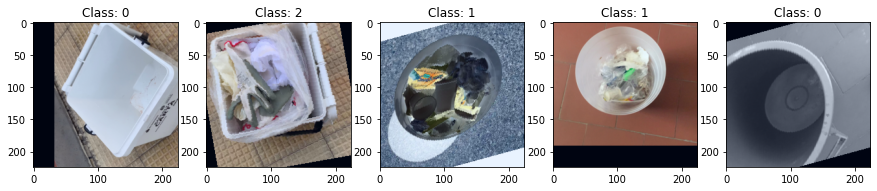

In [6]:
test_features, test_labels = next(iter(dst.test_loader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Class: %s" % test_labels[0].numpy())
    img = test_features[0].squeeze()
    label = test_labels[0]
    plt.imshow(reverse_norm(img.numpy().transpose(1, 2, 0)))
    test_features, test_labels = next(iter(dst.test_loader))
plt.show()

## Using LR finder libs

In [4]:
criterion = nn.CrossEntropyLoss()

optim_lr = 0.001
momentum = 0.99
end_lr = 0.01
num_iter = 100

### AlexNet

Initializing: AlexNet


100%|██████████| 100/100 [1:54:49<00:00, 68.89s/it]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.27E-03


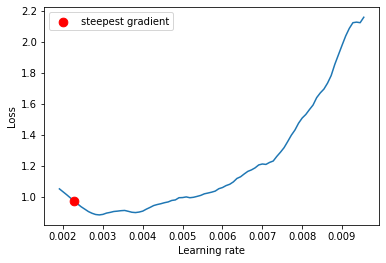

In [8]:
alexnet = init_model(creator=AlexNet_cc(), model_name='AlexNet', feature_extract=True, use_pretrained=True)
alexnet = alexnet.ret_model()

optimizer = optim.SGD(alexnet.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(alexnet, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Suggested lr is `0.00227`

### SqueezeNet 1.0

Initializing: SqueezeNet


100%|██████████| 100/100 [3:21:12<00:00, 120.73s/it]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.00E-03


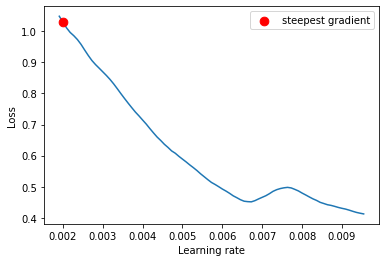

In [5]:
squeezenet = init_model(creator=SqueezeNet_cc(), model_name='SqueezeNet', feature_extract=True, use_pretrained=True)
squeezenet = squeezenet.ret_model()

optimizer = optim.SGD(squeezenet.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(squeezenet, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Suggested lr is `0.002`

### ResNet18

Initializing: ResNet18


100%|██████████| 100/100 [4:20:14<00:00, 156.14s/it]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.55E-03


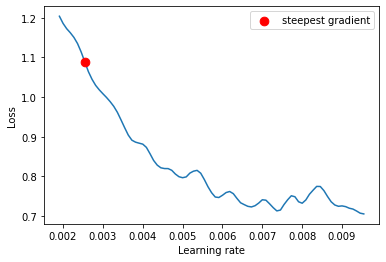

In [6]:
resnet18 = init_model(creator=ResNet18_cc(), model_name='ResNet18', feature_extract=True, use_pretrained=True)
resnet18 = resnet18.ret_model()

optimizer = optim.SGD(resnet18.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(resnet18, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

lr suggested is `0.00255`

### Squeezenet 1.1

Initializing: SqueezeNet1_1


100%|██████████| 100/100 [2:10:26<00:00, 78.27s/it]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.82E-03


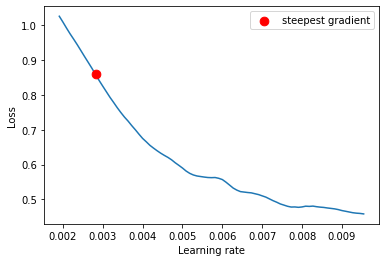

In [5]:
## squeezenet 1.1

squeezenetv1_1 = init_model(creator=SqueezeNet1_cc(), model_name='SqueezeNet1_1', feature_extract=True, use_pretrained=True)
squeezenetv1_1 = squeezenetv1_1.ret_model()

optimizer = optim.SGD(squeezenetv1_1.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(squeezenetv1_1, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

### VGG11

In [6]:
# vgg 11

vgg11 = init_model(creator=Vgg11_cc(), model_name='Vgg11', feature_extract=True, use_pretrained=True)
vgg11 = vgg11.ret_model()

optimizer = optim.SGD(vgg11.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(vgg11, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Initializing: Vgg11


 22%|██▏       | 22/100 [3:09:16<11:11:30, 516.55s/it]

### VGG11 with batch normalization

In [11]:
# vgg 11 bn

vgg11_bn = init_model(creator=Vgg11_bn_cc(), model_name='Vgg11_bn', feature_extract=True, use_pretrained=True)
vgg11_bn = vgg11_bn.ret_model()

optimizer = optim.SGD(vgg11_bn.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(vgg11_bn, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Initializing: Vgg11_bn


  0%|          | 0/100 [00:00<?, ?it/s]

### DenseNet121

In [10]:
# densenet121

densenet121 = init_model(creator=Densenet121_cc(), model_name='DenseNet121', feature_extract=True, use_pretrained=True)
densenet121 = densenet121.ret_model()

optimizer = optim.SGD(densenet121.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(densenet121, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Initializing: DenseNet121


  1%|          | 1/100 [07:32<12:27:12, 452.85s/it]


KeyboardInterrupt: 

### MobileNet v2

In [9]:
mobilenetv2 = init_model(creator=MobilenetV2_cc(), model_name='MobileNetV2', feature_extract=True, use_pretrained=True)
mobilenetv2 = mobilenetv2.ret_model()

optimizer = optim.SGD(mobilenetv2.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(mobilenetv2, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Initializing: MobileNetV2


  2%|▏         | 2/100 [07:07<5:48:59, 213.67s/it]


KeyboardInterrupt: 

### Inception V3

In [7]:
inceptionv3 = init_model(creator=InceptionV3_cc(), model_name='InceptionV3', feature_extract=True, use_pretrained=True)
inceptionv3 = inceptionv3.ret_model()
# need to be disabled, inceptionv3 returns a tuple
inceptionv3.aux_logits = False

optimizer = optim.SGD(inceptionv3.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(inceptionv3, optimizer, criterion)
lr_finder.range_test(train_loader=dst_inceptionv3.training_loader, val_loader=dst_inceptionv3.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Initializing: InceptionV3


  0%|          | 0/100 [00:08<?, ?it/s]


AttributeError: 'InceptionOutputs' object has no attribute 'log_softmax'